In [12]:
import math

import pandas as pd
import numpy as np
import csv
from sklearn import svm
import math
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import matplotlib

In [5]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

(70, 2) (30, 2) (70,) (30,)


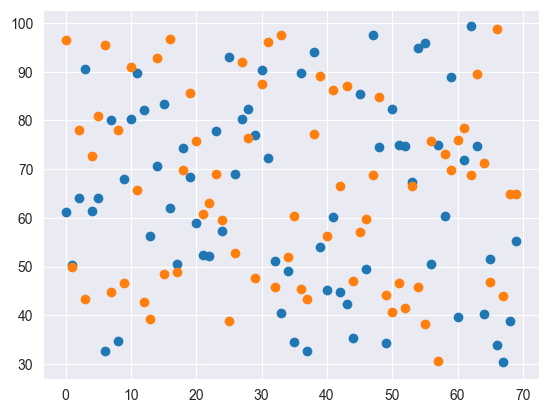

In [22]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
plt.plot(x_train,'o')

In [54]:
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    # 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
    #     a. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
    # 2. posortuj kolekcję względem dystansów, rosnąco
    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)
    # 4. klasa rozważanego przykładu example będzie taka jak większość wśród k przykładów z najkrótszym dystansem
    collection=[]
    for index,sample in enumerate(X):
        i=0
        distance=0
        while i<len(sample):
            distance+=(sample[i]-example[i])**2
            i+=1
        distance=math.sqrt(distance)
        collection.append((distance,y[index]))
    sorted_collection= sorted(collection, key=lambda x: x[0])
    first_k_collection=sorted_collection[:k]

    check_highest_count={}
    for distance,klasa in first_k_collection:
        if klasa not in check_highest_count:
            check_highest_count[klasa]=1
        else:
            check_highest_count[klasa]+=1
    max_key = max(check_highest_count, key=check_highest_count.get)
    return max_key
classify(x_train,y_train,(100,30),5)


1.0

In [41]:
ks=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
acc = np.zeros(len(ks))

for k_idx, k in enumerate(ks):
    y_pred = np.zeros(y_test.shape)
    correct_count = 0

    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
        if pred == y_test[example_idx]:
            correct_count += 1

    acc[k_idx] = correct_count / len(y_test)

ks=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
acc_test = np.zeros(len(ks))

for k_idx, k in enumerate(ks):
    y_pred = np.zeros(y_train.shape)
    correct_count = 0

    for example_idx, example in enumerate(x_train):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
        if pred == y_train[example_idx]:
            correct_count += 1

    acc_test[k_idx] = correct_count / len(y_train)


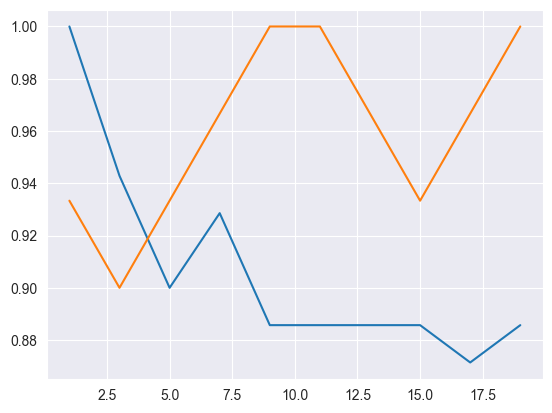

In [43]:
plt.plot(ks,acc_test)
plt.plot(ks,acc)

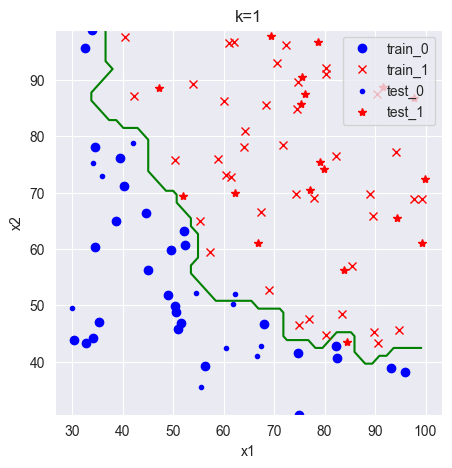

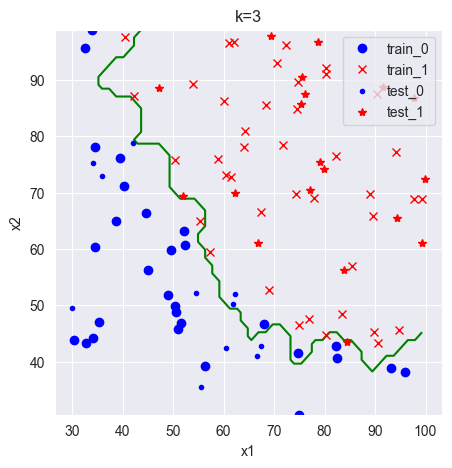

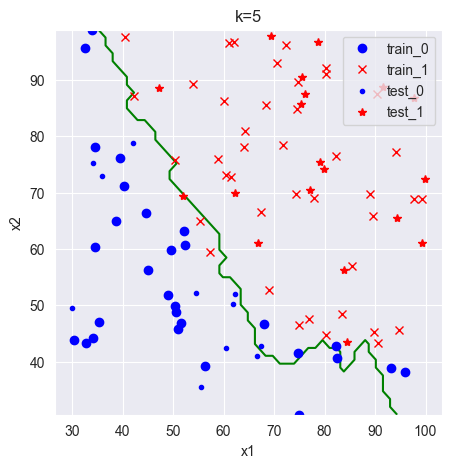

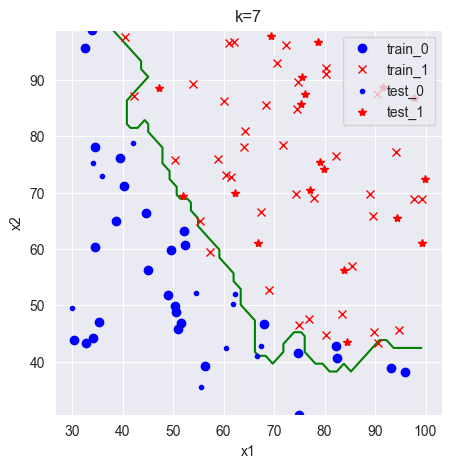

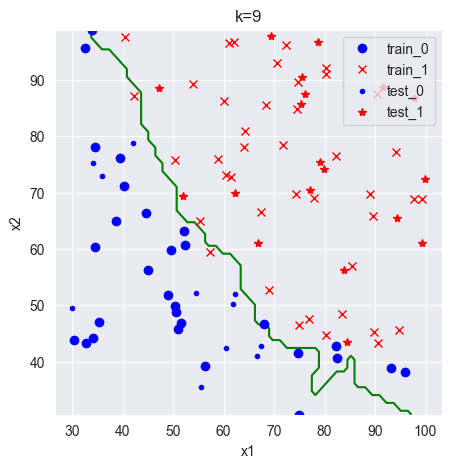

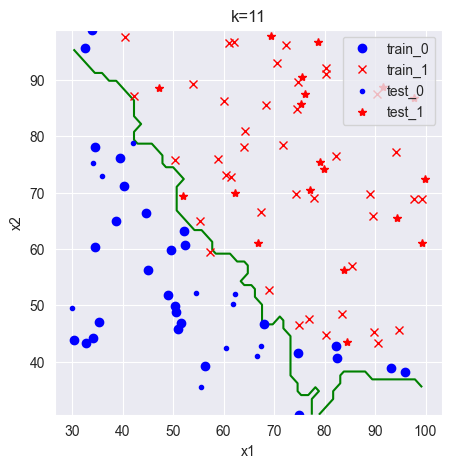

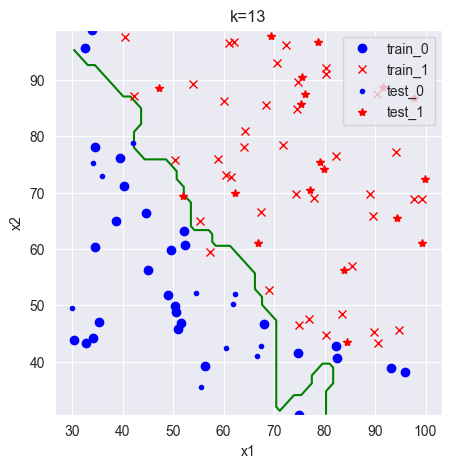

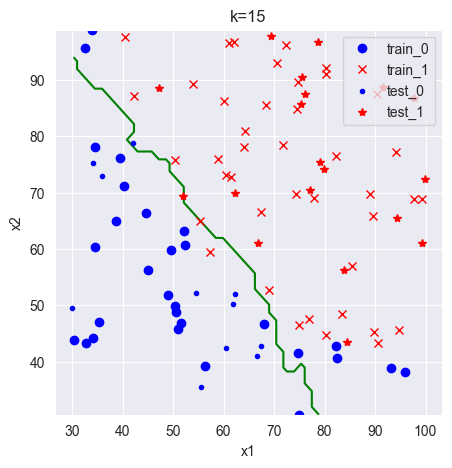

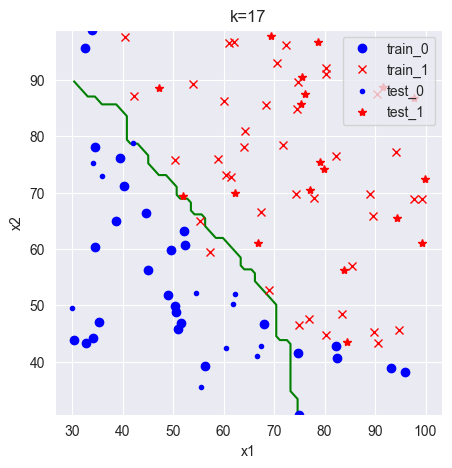

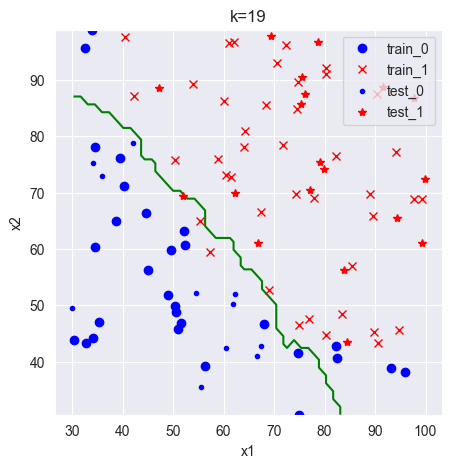

In [52]:
# setup plot
ks=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
for k in ks:
        plt.figure(figsize=(5, 5))
        plt.title(f'k={k}')
        plt.xlabel('x1')
        plt.ylabel('x2')

        # prepare data for contour plot
        x1_res = 50
        x2_res = 50
        x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
        x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
        x1x1, x2x2 = np.meshgrid(x1, x2)
        x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
        labels_space = np.zeros((x1_res, x2_res))
        for row_idx in range(x2_res):
           for col_idx in range(x1_res):
               example = np.array([x1[col_idx], x2[row_idx]])
               pred = classify(x_train, y_train, example, k)
               labels_space[row_idx, col_idx] = pred
        # plot decision boundary
        plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

        # plot training set
        plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
        plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

        # plot test set
        plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
        plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

        plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])

In [58]:

# True Positive (TP), False Negative (FN), and False Positive (FP) counts for the test set
TP_test = acc * len(y_test)
FN_test = len(y_test) - TP_test
FP_test = np.sum(y_pred != y_test)

# True Positive (TP), False Negative (FN), and False Positive (FP) counts for the training set
TP_train = acc_test * len(y_train)
FN_train = len(y_train) - TP_train
FP_train = np.sum(y_pred != y_train)

# Calculate Sensitivity (Recall) and Positive Predictive Value (Precision) for both test and training sets
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)


for k, sens_test, prec_test, sens_train, prec_train in zip(ks, sensitivity_test, precision_test, sensitivity_train, precision_train):
    print(f"For k={k}:")
    print(f"Test Set - Sensitivity (Recall): {sens_test}, Positive Predictive Value (Precision): {prec_test}")
    print(f"Training Set - Sensitivity (Recall): {sens_train}, Positive Predictive Value (Precision): {prec_train}")

For k=1:
Test Set - Sensitivity (Recall): 0.9333333333333333, Positive Predictive Value (Precision): 0.9655172413793104
Training Set - Sensitivity (Recall): 1.0, Positive Predictive Value (Precision): 0.8974358974358975
For k=3:
Test Set - Sensitivity (Recall): 0.9, Positive Predictive Value (Precision): 0.9642857142857143
Training Set - Sensitivity (Recall): 0.9428571428571428, Positive Predictive Value (Precision): 0.8918918918918919
For k=5:
Test Set - Sensitivity (Recall): 0.9333333333333333, Positive Predictive Value (Precision): 0.9655172413793104
Training Set - Sensitivity (Recall): 0.9, Positive Predictive Value (Precision): 0.8873239436619719
For k=7:
Test Set - Sensitivity (Recall): 0.9666666666666667, Positive Predictive Value (Precision): 0.9666666666666667
Training Set - Sensitivity (Recall): 0.9285714285714286, Positive Predictive Value (Precision): 0.8904109589041096
For k=9:
Test Set - Sensitivity (Recall): 1.0, Positive Predictive Value (Precision): 0.967741935483871
T

C:\Users\adamp\AppData\Local\Temp\ipykernel_40112\148175671.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  FP_test = np.sum(y_pred != y_test)


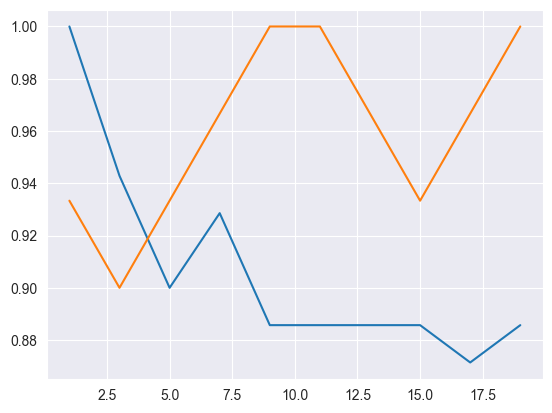

In [71]:
from sklearn.neighbors import KNeighborsClassifier


ks=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
acc = np.zeros(len(ks))

for k_idx, k in enumerate(ks):

    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train, y_train)

    y_pred = knn_classifier.predict(x_test)
    correct_count = 0

    for example_idx, example in enumerate(x_test):
        if  y_pred[example_idx] == y_test[example_idx]:
            correct_count += 1

    acc[k_idx] = correct_count / len(y_test)

ks=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
acc_test = np.zeros(len(ks))

for k_idx, k in enumerate(ks):

    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train, y_train)

    y_pred = knn_classifier.predict(x_train)
    correct_count = 0
    for example_idx, example in enumerate(x_train):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
        if pred == y_train[example_idx]:
            correct_count += 1

    acc_test[k_idx] = correct_count / len(y_train)

plt.plot(ks,acc_test)
plt.plot(ks,acc)

In [74]:
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
data = load_digits()
y = data['target']
X= data['data']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)


In [75]:

ks=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
acc = np.zeros(len(ks))

for k_idx, k in enumerate(ks):

    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train, y_train)

    y_pred = knn_classifier.predict(x_test)
    correct_count = 0

    for example_idx, example in enumerate(x_test):
        if  y_pred[example_idx] == y_test[example_idx]:
            correct_count += 1

    acc[k_idx] = correct_count / len(y_test)


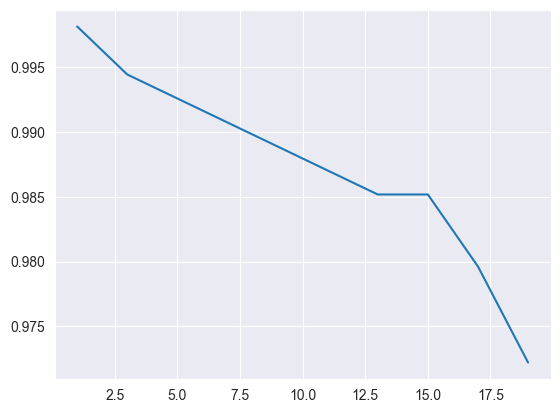

In [76]:
plt.plot(ks,acc)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

ks = [ 3, 5, 7, 9, 11, 13, 15, 17, 19]
acc = np.zeros(len(ks))

k_idx=4
best_knn_classifier = KNeighborsClassifier(n_neighbors=ks[k_idx])
best_knn_classifier.fit(x_train, y_train)

y_pred_best = best_knn_classifier.predict(x_test)

report = classification_report(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print("Best k:", ks[k_idx])
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Best k: 11
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.93      1.00      0.96        54
           2       1.00      1.00      1.00        48
           3       1.00      0.98      0.99        49
           4       1.00      0.97      0.98        67
           5       1.00      1.00      1.00        46
           6       0.98      1.00      0.99        63
           7       0.98      1.00      0.99        44
           8       0.98      0.93      0.95        57
           9       1.00      1.00      1.00        55

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

Confusion Matrix:
[[57  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  1  0]
 [ 0  1  0  0 65  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  

## Drzewa decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeClassifier
lvls=[1,2,3,4,5]


ValueError: setting an array element with a sequence.

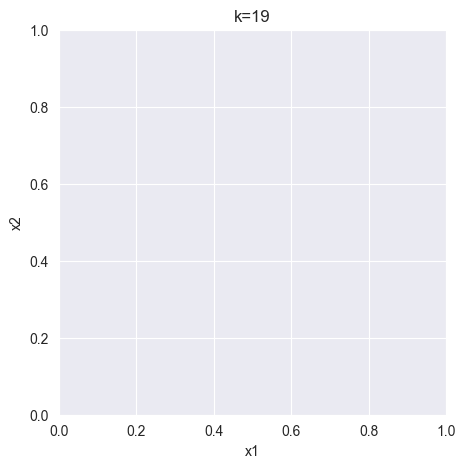

In [85]:
from sklearn.tree import DecisionTreeClassifier


# setup plot
lvls=[1,2,3,4,5]
for lvl in lvls:
        plt.figure(figsize=(5, 5))
        plt.title(f'k={k}')
        plt.xlabel('x1')
        plt.ylabel('x2')
        decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
        decision_tree.fit(x_train, y_train)

        # prepare data for contour plot
        x1_res = 50
        x2_res = 50
        x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
        x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
        x1x1, x2x2 = np.meshgrid(x1, x2)
        x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
        labels_space = np.zeros((x1_res, x2_res))
        for row_idx in range(x2_res):
           for col_idx in range(x1_res):
               example = np.array([x1[col_idx], x2[row_idx]])
               pred = decision_tree.predict(x_test)
               labels_space[row_idx, col_idx] = pred
        # plot decision boundary
        plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

        # plot training set
        plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
        plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

        # plot test set
        plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
        plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

        plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])